(a) How did you access the dataset?
Accessed through Kaggle by downloading it from the (https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/data).

Source: The dataset is sourced from Kaggle and based on the 2017 November update of the SEER Program by the National Cancer Institute (NCI).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/FinalProject
!ls


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/FinalProject
Breast_Cancer.csv  CO2_Emissions.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('Breast_Cancer.csv')
print(df.head)

<bound method NDFrame.head of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        

3 .Exploratoty Data Analysis(EDA)


Dataset Values:
<bound method NDFrame.describe of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regiona

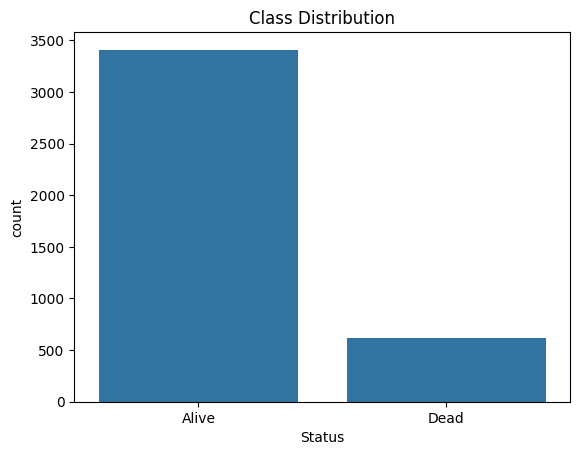

In [ ]:
#Summary statistics
print("\nDataset Values:")
print(df.describe)

print('\n Missing values')
print(df.isnull().sum())

sns.countplot(x='Status', data=df)
plt.title('Class Distribution')
plt.show()

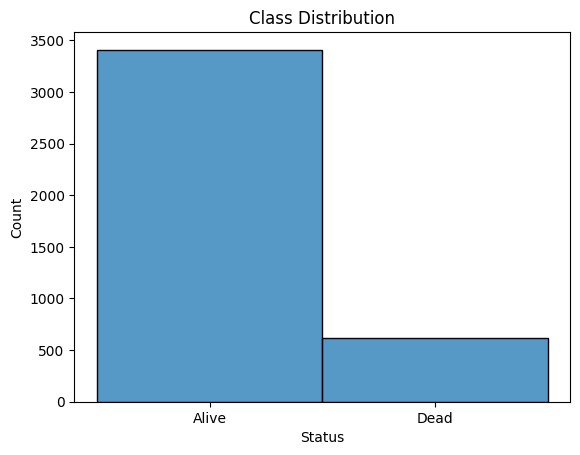

In [ ]:
sns.histplot(data=df, x='Status', discrete=True)

# Add title and display the plot
plt.title('Class Distribution')
plt.show()

Feature Selection for Both Models

4 . Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# df.copy()
print(df['Status'].unique())
# Convert target variable to binary (1 for "Alive", 0 for "Dead" assuming it has such values)
# df['Status'] = df['Status'].apply(lambda x:1 if x == "Alive" else 0)
df['Status'] = df['Status'].map({'Alive': 1, 'Dead': 0})
print(df['Status'].unique())  # Should print [0, 1]

#select catagorical cloumns and encode them
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()
if 'Status' in categorical_cols:
    categorical_cols.remove('Status')

#Apply one-hot encoding  to categorical features
df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)


#Seperate features and target variables
X= df.drop(columns=['Status']).values
y= df['Status'].values



#split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

print("Class distribution in train set:", np.bincount(y_train))
print("Class distribution in test set:", np.bincount(y_test))

['Alive' 'Dead']
[1 0]
Class distribution in train set: [ 493 2726]
Class distribution in test set: [123 682]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 best features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = np.array(df.drop(columns=['Status']).columns)[selector.get_support()]
print("Selected Features:", selected_features)

# Reduce X_train and X_test using selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


Selected Features: ['Tumor Size' 'Reginol Node Positive' 'Survival Months' 'T Stage _T4'
 'N Stage_N3' '6th Stage_IIIC' 'differentiate_Poorly differentiated'
 'Grade_3' 'Estrogen Status_Positive' 'Progesterone Status_Positive']


In [ ]:

# Normalize the features
scaler = StandardScaler() #compute mean and statndard deviation
scaler.fit(X_train)
sc_X_train = scaler.fit_transform(X_train)
sc_X_test = scaler.transform(X_test)
# X= scaler.fit_transform(x_train)


#Normalizing (scaling the features)
import random
def initialize_params(d):
  b= random.random()
  w = np.random.random(d)
  return b,w

b,w= initialize_params(sc_X_train.shape[1])
b,w


#define logistic function
def logistic_function(sc_X_train, w, b):
  z= b + np.dot(sc_X_train, w)
  return 1/(1+ np.exp(-z))

y_pred= logistic_function(sc_X_train, w,b)
y_pred




array([0.83953243, 0.06295437, 0.14488082, ..., 0.25599261, 0.03345396,
       0.16777296])

Building logistic regression from scratch

In [ ]:
import random
def initialize_params(d):
  b= random.random()
  w = np.random.random(d)
  return b,w

b,w= initialize_params(sc_X_train.shape[1])
b,w


#define logistic function
def logistic_function(sc_X_train, w, b):
  z= b + np.dot(sc_X_train, w)
  return 1/(1+ np.exp(-z))

y_pred= logistic_function(sc_X_train, w,b)
y_pred


array([0.95054   , 0.21030579, 0.071729  , ..., 0.46805113, 0.00586566,
       0.58973949])

In [ ]:
def cost_function(Y_train, y_pred, lambda_, w):
    m = len(y_train)

    # Clip y_pred to avoid log(0) or log(1)
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = - np.sum(np.dot(y_train, np.log(y_pred)) + np.dot(1 - y_train, np.log(1 - y_pred))) / m + (lambda_ / 2 * m * np.sum(w**2))
    return cost



In [ ]:
# Update parameters
def update_parameters(y_train,y_hat,b0,w0,alpha,lambda_):
  m = len(y_train)
  dw = np.dot((y_hat-y_train),sc_X_train)/m + (lambda_/m)*w0
  db = np.sum(y_hat-y_train)/m
  w0 = w0-alpha*dw
  b0 = b0-alpha*db
  return b0,w0

In [ ]:
#Gradient Descent
n_iter=1000
alpha =0.01
lambda_=0.1
cost_fun =[]
for i in range(n_iter):
  y_pred= logistic_function(sc_X_train, w, b)
  cost_now= cost_function(y_train, y_pred, lambda_,w)
  b, w = update_parameters(y_train, y_pred, b, w, alpha, lambda_)
  cost_fun.append(cost_now)

In [ ]:
print(len(cost_fun))

1000


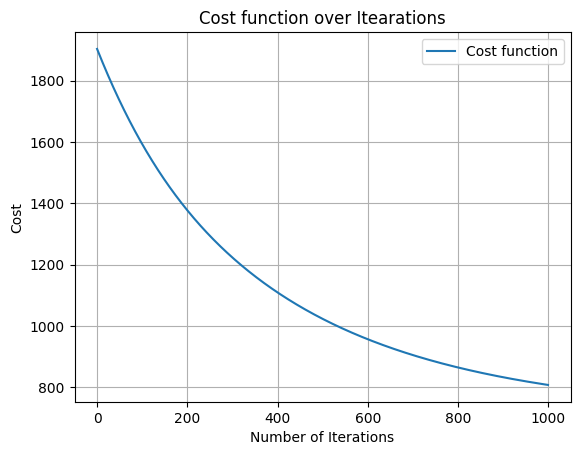

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.plot(range(n_iter), cost_fun, label="Cost function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost function over Itearations")
plt.grid()
plt.legend()
plt.show()

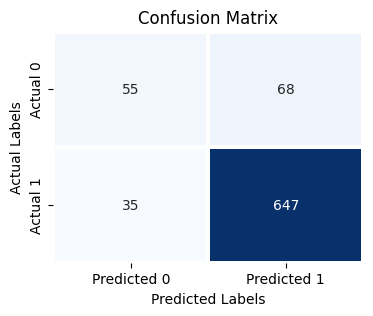

In [ ]:
# Assuming 'logistic_function', 'w', and 'b' are defined and available
y_pred_test = logistic_function(sc_X_test, w, b)  # Predict probabilities
y_pred_test = (y_pred_test >= 0.5).astype(int)  # Convert to binary predictions

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Convert to DataFrame
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot confusion matrix using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=1.5, cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

6. Verify Using Built-in LogisticRegression from Scikit-Learn

In [ ]:
# Train logistic regression using sklearn
sklearn_log_reg = LogisticRegression()
sklearn_log_reg.fit(sc_X_train, y_train)

# Predictions
y_pred_sklearn = sklearn_log_reg.predict(sc_X_test)
# Evaluate sklearn logistic regression
print("\nScikit-Learn Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred_sklearn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sklearn))



Scikit-Learn Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.74      0.41      0.53       123
           1       0.90      0.97      0.94       682

    accuracy                           0.89       805
   macro avg       0.82      0.69      0.73       805
weighted avg       0.88      0.89      0.87       805

Confusion Matrix:
[[ 51  72]
 [ 18 664]]


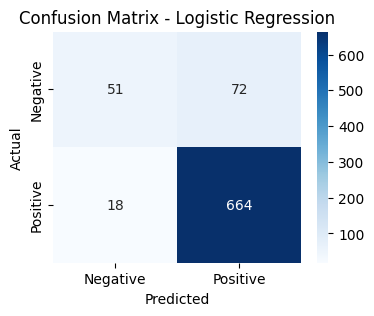

In [ ]:


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_sklearn)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


7. Cross-Verify Using Random Forest Classifier


In [ ]:
# Train Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest Model
print("\nRandom Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       123
           1       0.91      0.98      0.94       682

    accuracy                           0.90       805
   macro avg       0.85      0.72      0.76       805
weighted avg       0.89      0.90      0.89       805

Confusion Matrix:
[[ 56  67]
 [ 14 668]]


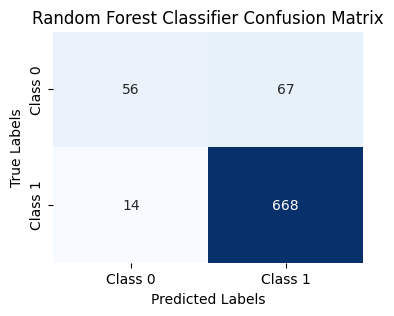

In [ ]:

# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
y_hat_pred = logistic_function(sc_X_test, w,b)
y_predict= (y_hat_pred>= 0.5).astype(int)
accuracy_score(y_predict, y_test)

0.8720496894409938

<function matplotlib.pyplot.show(close=None, block=None)>

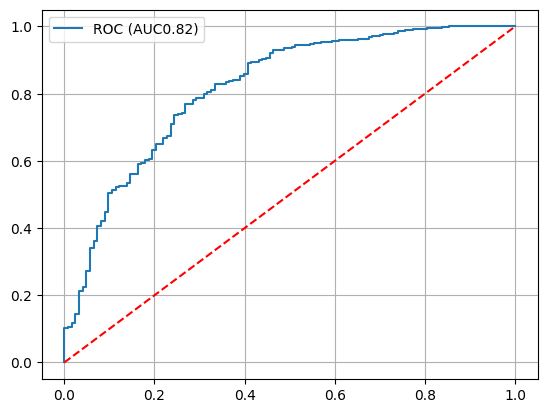

In [ ]:
fpr, tpr,_= roc_curve(y_test, y_hat_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC (AUC{roc_auc:.2f})')
plt.plot([0,1], [0,1], color='r', linestyle='--')
plt.legend()
plt.grid()
plt.show

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
log = LogisticRegressionCV()
log.fit(sc_X_train, y_train)


LogisticRegressionCV()

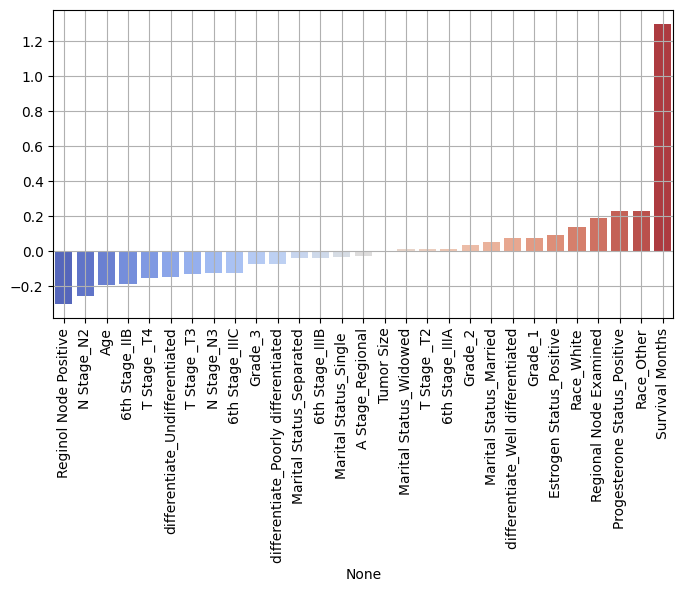

In [ ]:

plt.figure(figsize=(8,4))
feature_names = df.drop(columns=['Status']).columns
coefs = pd.Series(index= feature_names, data=log.coef_[0])
# coefs = pd.Series(index =X.columns, data = log.coef_[0])
coefs= coefs.sort_values()
sns.barplot(x=coefs.index,y=coefs.values,hue=coefs.index,palette='coolwarm')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("\nBest Parameters for Random Forest:", grid_search.best_params_)

# Predictions with the optimized model
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)

# Evaluating Optimized Random Forest Model
print("\nOptimized Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best_rf))


Best Parameters for Random Forest: {'max_depth': 15, 'n_estimators': 150}

Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       123
           1       0.91      0.98      0.94       682

    accuracy                           0.90       805
   macro avg       0.85      0.72      0.76       805
weighted avg       0.89      0.90      0.89       805




Best Parameters for Random Forest: {'max_depth': 15, 'n_estimators': 150}

Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       123
           1       0.91      0.98      0.94       682

    accuracy                           0.90       805
   macro avg       0.85      0.72      0.76       805
weighted avg       0.89      0.90      0.89       805



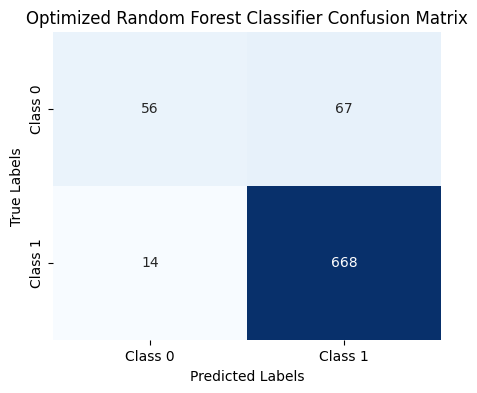

In [ ]:

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters
print("\nBest Parameters for Random Forest:", grid_search.best_params_)

# Predictions with the optimized model
y_pred_best_rf = grid_search.best_estimator_.predict(X_test)

# Evaluating Optimized Random Forest Model
print("\nOptimized Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best_rf))

# Generate confusion matrix for optimized model
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)

# Plot confusion matrix for optimized model
plt.figure(figsize=(5, 4))
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Optimized Random Forest Classifier Confusion Matrix')
plt.show()

In [ ]:
# Using best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
rf_final = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                  max_depth=best_params['max_depth'],
                                  random_state=42)

# Train the final model using only selected features
rf_final.fit(X_train_selected, y_train)

# Predictions
y_pred_final_rf = rf_final.predict(X_test_selected)

# Evaluate Final Optimized Model
print("\nFinal Optimized Random Forest Model Performance:")
print(classification_report(y_test, y_pred_final_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final_rf))



Final Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.40      0.51       123
           1       0.90      0.97      0.93       682

    accuracy                           0.88       805
   macro avg       0.81      0.69      0.72       805
weighted avg       0.87      0.88      0.87       805

Confusion Matrix:
[[ 49  74]
 [ 19 663]]



Final Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.40      0.51       123
           1       0.90      0.97      0.93       682

    accuracy                           0.88       805
   macro avg       0.81      0.69      0.72       805
weighted avg       0.87      0.88      0.87       805



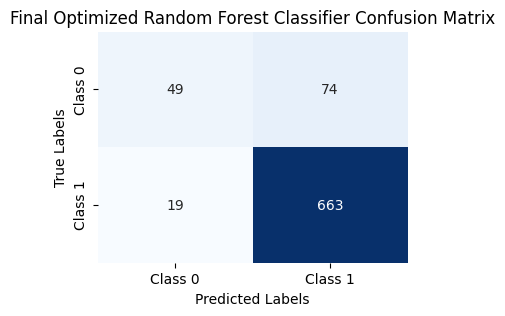

In [ ]:
# Assuming best_params and X_train_selected, X_test_selected are already defined
rf_final = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                  max_depth=best_params['max_depth'],
                                  random_state=42)

# Train the final optimized Random Forest model
rf_final.fit(X_train_selected, y_train)

# Predictions
y_pred_final_rf = rf_final.predict(X_test_selected)

# Evaluate Final Optimized Model
print("\nFinal Optimized Random Forest Model Performance:")
print(classification_report(y_test, y_pred_final_rf))

# Generate confusion matrix for the final optimized model
cm_final_rf = confusion_matrix(y_test, y_pred_final_rf)

# Plot confusion matrix for the final optimized model
plt.figure(figsize=(4, 3))
sns.heatmap(cm_final_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Final Optimized Random Forest Classifier Confusion Matrix')
plt.show()